<img src="./image/Nile.jpg" width="1000" height="25">

[*source*](https://en.wikipedia.org/wiki/Nile#/media/File:Evening,_Nile_River,_Uganda.jpg)

## <span style="color:steelblue">West Nile Virus Exploratory Data Analysis (EDA) notebook</span>

---
---

### Content:

#### 1) Introduction and Problem Statement
#### 2) Background
#### 3) Data Dictionary
#### 4) Data Sets Used
#### 5) Data Cleaning
#### 6) Exploratory Data Analysis (EDA)
#### 7) Key Points and Summary

---
---

### <span style="color:steelblue">1) Intro & Problem Statement:</span>

We are a group of data scientists working who just started work at the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). Due to the recent epidemic of West Nile Virus in the Windy City, we've been tasked by the Department of Public Health to build a classifer model to predict the possibility of west Nile Virus occuring on various locations of interest based on the data collected over time. It is our hope that with the model, we could make more informed decisions on the deployment of pesticides in the fight for public health and safety. While pesticides are a necessary evil in the fight against the West Nile Virus, it is very expensive. At such, we will also conduct a cost-benefit analysis regarding use of pesticides to manage the epidemic.

---
---

### <span style="color:steelblue">2) Background:</span>

According to the Centers for Disease Control and Prevention, the West Nile virus (WNV) is the leading mosquito-borne disease in the United States ([*Source: CDC, 2009*](https://www.cdc.gov/westnile/index.html))
.  It is most commonly spread to people by the bite of an infected mosquito. Cases of WNV occur during mosquito season, which starts in the summer and continues through fall. There are no vaccines to prevent or medications to treat WNV in people. Fortunately, most people infected with WNV do not feel sick. About 1 in 5 people who are infected develop a fever and other symptoms. About 1 out of 150 infected people develop a serious, sometimes fatal, illness. People can reduce their risk of WNV by using insect repellent and wearing long-sleeved shirts and long pants to prevent mosquito bites. This is essential as the medical costs can be outstanding especially if the disease progresses and causes neurological symptoms.

---
---

### <span style="color:steelblue">3) Data Dictionary:</span>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Id|Int|Test.csv|ID number of the record|
|Date|Datetime|Train.csv/Test.csv|Date and time WNV test was performed|
|Address|Str|Train.csv/Test.csv|Approx. address for trap|
|Species|Str|Train.csv/Test.csv|Species of mosquitoes in trap|
|Block|Int|Train.csv/Test.csv|Block number of address|
|Street|Str|Train.csv/Test.csv|Street of address|
|Trap|Str|Train.csv/Test.csv|ID number of trap|
|AddressNumberAndStreet|Str|Train.csv/Test.csv|Approx. address|
|Latitude|Float|Train.csv/Test.csv|Latitude from GeoCoder|
|Longitude|Float|Train.csv/Test.csv|Longitude from GeoCoder|
|AddressAccuracy|Int|Train.csv/Test.csv|Accuracy of info from GeoCoder|
|NumMosquitos|Int|Train.csv|Number of mosquitoes in sample
|WnvPresent|Int|Train.csv|Whether WNV is present in a sample (1 = present; 0 = absent)|
|Date|Datetime|Spray.csv|Date of spray|
|Time|Datetime|Spray.csv|Time of spray|
|Latitude|Float|Spray.csv|Latitude of spray|
|Longitude|Float|Spray.csv|Longitude of spray|
|Station|Int|Weather.csv|Weather station (1 or 2)|
|Date|Datetime|Weather.csv|Date of measurement|
|Tmax|Int|Weather.csv|Maximum daily temperature (F)|
|Tmin|Int|Weather.csv|Minimum daily temperature (F)|
|Tavg|Int|Weather.csv|Average daily temperature (F)|
|Depart|Int|Weather.csv|Departure from normal temperature (F)|
|Dewpoint|Int|Weather.csv|Average dewpoint (F)|
|WetBulb|Int|Weather.csv|Average wet bulb|
|Heat|Int|Weather.csv|Heating degree days|
|Cool|Int|Weather.csv|Cooling degree days|
|Sunrise|Int|Weather.csv|Calculated time of sunrise|
|Sunset|Int|Weather.csv|Calculated time of sunset|
|CodeSum|Str|Weather.csv|Code of weather phenomena|
|Depth|Int|Weather.csv|Snow Depth in inches|
|Water1|Int|Weather.csv|Amount of water from melted snow|
|SnowFall|Int|Weather.csv|Snowfall(inch)|
|PrecipTotal|Str|Weather.csv|Total daily rainfall (inch)|
|StnPressure|Int|Weather.csv|Average atmospheric pressure (inch Hg)|
|SeaLevel|Int|Weather.csv|Average sea level pressure (inch Hg)|
|ResultSpeed|Float|Weather.csv|Resultant wind speed (mph)|
|ResultDir|Int|Weather.csv|Resultant wind direction (degrees)|
|AveSpeed|Int|Weather.csv|Average wind speed (mph)|


---
---

### <span style="color:steelblue"> 4) Data Sets Used: </span>

#### 1) spray
#### 2) spray_clean
#### 3) test
#### 4) test_clean
#### 5) test_weather_clean
#### 6) train
#### 7) train_clean
#### 8) train_weather_clean
#### 9) weather
#### 10) weather_clean

---
---

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as stats
import seaborn as sns
import os
import re
import time
import datetime as datetime
 

#for kernel dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline
sns.set()

### Load Data

In [2]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
spray = pd.read_csv('./assets/spray.csv')
weather = pd.read_csv('./assets/weather.csv')

In [3]:
# Checking out the first 5 rows of the datasets

#train.head()
#test.head()
#spray.head()
#weather.head()

In [4]:
# Checking out the shape of the datasets

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print("Spray Shape:", spray.shape)
print("Weather Shape:", weather.shape)

Train Shape: (10506, 12)
Test Shape: (116293, 11)
Spray Shape: (14835, 4)
Weather Shape: (2944, 22)


In [5]:
print("Train Missing Values:", train.isnull().sum().sum())
print("Test Missing Values:", test.isnull().sum().sum())
print("Spray Missing Values:", spray.isnull().sum().sum())
print("Weather Missing Values:", weather.isnull().sum().sum())

Train Missing Values: 0
Test Missing Values: 0
Spray Missing Values: 584
Weather Missing Values: 0


In [6]:
print("Train Duplicates:", train.duplicated().sum())
print("Test Duplicates:", test.duplicated().sum())
print("Spray Duplicates:", spray.duplicated().sum())
print("Weather Duplicates:", weather.duplicated().sum())

Train Duplicates: 813
Test Duplicates: 0
Spray Duplicates: 541
Weather Duplicates: 0


In [7]:
#print(train.dtypes)
#print(test.dtypes)
#print(spray.dtypes)
#print(weather.dtypes)

In [8]:
# Changing columns to lowercase

def columns_lowercase (columns):
    ''' Input columns, output columns in lowercase'''
    return [column.lower() for column in columns]

train.columns = columns_lowercase(train.columns)
test.columns = columns_lowercase(test.columns)
spray.columns = columns_lowercase(spray.columns)
weather.columns = columns_lowercase(weather.columns)

---
---

### <span style="color:steelblue"> 5) Data Cleaning</span>

---
---

### (1) Train  and Test Dataset

#### Drop Unneccessary Columns

In [9]:
test.head(3)

,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [10]:
train.drop(['address', 'street', 'addressnumberandstreet', 'addressaccuracy'], axis = 1, inplace = True)
test.drop(['address', 'street', 'addressnumberandstreet', 'addressaccuracy'], axis = 1, inplace = True)

#### Changing Columns to DateTime Format

In [11]:
train['date']= pd.to_datetime(train.date)
train['year']= train.date.dt.year
train['month']= train.date.dt.month
train['day']= train.date.dt.day

In [12]:
test['date']= pd.to_datetime(test.date)
test['year']= test.date.dt.year
test['month']= test.date.dt.month
test['day']= test.date.dt.day

In [13]:
train.drop(['date'], axis = 1, inplace = True)
test.drop(['date'], axis = 1, inplace = True)

In [14]:
test.head(3)

,id,species,block,trap,latitude,longitude,year,month,day
0,1,CULEX PIPIENS/RESTUANS,41,T002,41.95469,-87.800991,2008,6,11
1,2,CULEX RESTUANS,41,T002,41.95469,-87.800991,2008,6,11
2,3,CULEX PIPIENS,41,T002,41.95469,-87.800991,2008,6,11


#### Merging rows with same Trap ID

The number of mosquito counts is capped at 50 before being continued in a new row. Hence we will combined the rows with same trap ID to cancel out the duplicates.

In [15]:
# Adapted from cheekeet86

# Get columns with similar values
cols = ['species', 'block', 'trap','latitude','longitude', 'year', 'month', 'day']

# run for loop
for row_idx,row in train.iterrows():
    
    # skip 1st row
    if row_idx > 0:
        
        # reset counter for each row
        duplicate_count = 0        
        
        for col in cols:
            
            # compare cells in current and previous rows
            # increment counter if both cells have the same value 
            if train.at[row_idx,col] == train.at[row_idx-1,col]:
                duplicate_count += 1               
                
        # sum duplicate rows
        if duplicate_count == len(cols):
            train.at[row_idx,'nummosquitos'] = train.at[row_idx,'nummosquitos'] + train.at[row_idx-1,'nummosquitos']
            train.at[row_idx,'wnvpresent'] = train.at[row_idx,'wnvpresent'] + train.at[row_idx-1,'wnvpresent']

# remove duplicated rows (keep only last row)
train.drop_duplicates(subset=cols, keep='last',inplace=True)

In [16]:
train.sort_values(['year', 'month', 'day', 'trap','species'], ascending=[True, True,True, True, True],inplace=True)
test.sort_values(['year', 'month', 'day', 'trap','species'], ascending=[True, True,True, True, True],inplace=True)

In [17]:
train.head(10)

,species,block,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day
0,CULEX PIPIENS/RESTUANS,41,T002,41.954690,-87.800991,1,0,2007,5,29
1,CULEX RESTUANS,41,T002,41.954690,-87.800991,1,0,2007,5,29
2,CULEX RESTUANS,62,T007,41.994991,-87.769279,1,0,2007,5,29
3,CULEX PIPIENS/RESTUANS,79,T015,41.974089,-87.824812,1,0,2007,5,29
4,CULEX RESTUANS,79,T015,41.974089,-87.824812,4,0,2007,5,29
5,CULEX RESTUANS,15,T045,41.921600,-87.666455,2,0,2007,5,29
6,CULEX RESTUANS,25,T046,41.891118,-87.654491,1,0,2007,5,29
7,CULEX PIPIENS/RESTUANS,11,T048,41.867108,-87.654224,1,0,2007,5,29
8,CULEX RESTUANS,11,T048,41.867108,-87.654224,2,0,2007,5,29
9,CULEX RESTUANS,11,T049,41.896282,-87.655232,1,0,2007,5,29


#### Sorting wnvpresent to 0 or 1

In [18]:
train.wnvpresent.sort_values(ascending=False).head(7)

2101     10
9331      9
9992      8
2444      7
2469      6
10124     5
9981      4
Name: wnvpresent, dtype: int64

In [19]:
# create a for loop
for row_idx, row in train.iterrows():
    if row['wnvpresent'] > 1:
        train.at[row_idx,'wnvpresent'] = 1

#### Removing Special Characters via Regex

In [20]:
train.trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T027', 'T078', 'T097', 'T099', 'T100', 'T102',
      

In [21]:
train[train.trap=='T054'].head()

,species,block,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day
11,CULEX PIPIENS/RESTUANS,22,T054,41.921965,-87.632085,2,0,2007,5,29
12,CULEX RESTUANS,22,T054,41.921965,-87.632085,3,0,2007,5,29
40,CULEX RESTUANS,22,T054,41.921965,-87.632085,3,0,2007,6,5
159,CULEX PIPIENS/RESTUANS,22,T054,41.921965,-87.632085,3,0,2007,6,29
211,CULEX PIPIENS/RESTUANS,22,T054,41.921965,-87.632085,2,0,2007,7,2


In [22]:
train[train.trap=='T054C'].head()

,species,block,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day
9552,CULEX PIPIENS/RESTUANS,21,T054C,41.925652,-87.63359,47,0,2013,8,8
9709,CULEX PIPIENS,21,T054C,41.925652,-87.63359,45,1,2013,8,15
9708,CULEX PIPIENS/RESTUANS,21,T054C,41.925652,-87.63359,15,0,2013,8,15
9876,CULEX PIPIENS,21,T054C,41.925652,-87.63359,19,0,2013,8,22
9875,CULEX PIPIENS/RESTUANS,21,T054C,41.925652,-87.63359,11,0,2013,8,22


T094B and T054C are probably satellite traps of T094B and T054C as seen from the data. Satellite traps have are postfixed with an alphabet and located on the same street as their parent traps. This is to enhance the surveillance on areas with potentially more mosquitos present.

In [23]:
train['trap'] = train['trap'].apply(lambda x: re.sub(r'[^\d.]+','', x).lower())
test['trap'] = test['trap'].apply(lambda x: re.sub(r'[^\d.]+','', x).lower())

In [24]:
#train.to_csv('./assets/train_clean.csv', index=False)
#test.to_csv('./assets/test_clean.csv', index=False)

### (2) Weather Dataset

In [25]:
weather.head(6)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2


In [26]:
# Drop redundant columns
weather.drop(['snowfall', 'depth', 'water1', 'sunrise', 'sunset', 'codesum'], axis = 1, inplace = True)

In [27]:
# Change the date info into datetime format and split them
weather['date']= pd.to_datetime(weather.date)
weather['year']= weather.date.dt.year
weather['month']= weather.date.dt.month
weather['day']= weather.date.dt.day
weather.drop(['date'], axis = 1, inplace = True)

In [28]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station      2944 non-null   int64  
 1   tmax         2944 non-null   int64  
 2   tmin         2944 non-null   int64  
 3   tavg         2944 non-null   object 
 4   depart       2944 non-null   object 
 5   dewpoint     2944 non-null   int64  
 6   wetbulb      2944 non-null   object 
 7   heat         2944 non-null   object 
 8   cool         2944 non-null   object 
 9   preciptotal  2944 non-null   object 
 10  stnpressure  2944 non-null   object 
 11  sealevel     2944 non-null   object 
 12  resultspeed  2944 non-null   float64
 13  resultdir    2944 non-null   int64  
 14  avgspeed     2944 non-null   object 
 15  year         2944 non-null   int64  
 16  month        2944 non-null   int64  
 17  day          2944 non-null   int64  
dtypes: float64(1), int64(8), object(9)
memory usage:

#### Replacing 'M', 'T' & '-' Values

In [29]:
## Replace 'M' and '-, which represent missing values, with NaN.
weather = weather.replace('M', np.NaN)
weather = weather.replace('-', np.NaN)
weather = weather.replace('T', 0)
weather = weather.replace('  T', 0)

In [30]:
weather.head(10)

,station,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
0,1,83,50,67,14,51,56,0,2,0.00,29.10,29.82,1.7,27,9.2,2007,5,1
1,2,84,52,68,NaN,51,57,0,3,0.00,29.18,29.82,2.7,25,9.6,2007,5,1
2,1,59,42,51,-3,42,47,14,0,0.00,29.38,30.09,13.0,4,13.4,2007,5,2
3,2,60,43,52,NaN,42,47,13,0,0.00,29.44,30.08,13.3,2,13.4,2007,5,2
4,1,66,46,56,2,40,48,9,0,0.00,29.39,30.12,11.7,7,11.9,2007,5,3
5,2,67,48,58,NaN,40,50,7,0,0.00,29.46,30.12,12.9,6,13.2,2007,5,3
6,1,66,49,58,4,41,50,7,0,0,29.31,30.05,10.4,8,10.8,2007,5,4
7,2,78,51,NaN,NaN,42,50,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4,2007,5,4
8,1,66,53,60,5,38,49,5,0,0,29.40,30.10,11.7,7,12.0,2007,5,5
9,2,66,54,60,NaN,39,50,5,0,0,29.46,30.09,11.2,7,11.5,2007,5,5


As for the NaN values in the dataset, we will fill it up with the values from the opposite station as both stations are located closeby and have almost the same temperature for the different variables. 

In [31]:
# Filling in missing values with opposite station's values
weather.tmax = weather.tmax.fillna(method='ffill')
weather.tmin = weather.tmin.fillna(method='ffill')
weather.tavg = weather.tavg.fillna(method='ffill')
weather.depart = weather.depart.fillna(method='ffill')
weather.dewpoint = weather.dewpoint.fillna(method='ffill')
weather.wetbulb = weather.wetbulb.fillna(method='ffill')
weather.heat = weather.heat.fillna(method='ffill')
weather.cool = weather.cool.fillna(method='ffill')
weather.preciptotal = weather.preciptotal.fillna(method='ffill')
weather.stnpressure = weather.stnpressure.fillna(method='ffill')
weather.sealevel = weather.sealevel.fillna(method='ffill')
weather.resultspeed = weather.resultspeed.fillna(method='ffill')
weather.resultdir = weather.resultdir.fillna(method='ffill')
weather.avgspeed = weather.avgspeed.fillna(method='ffill')

In [32]:
weather.head()

,station,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
0,1,83,50,67,14,51,56,0,2,0.00,29.10,29.82,1.7,27,9.2,2007,5,1
1,2,84,52,68,14,51,57,0,3,0.00,29.18,29.82,2.7,25,9.6,2007,5,1
2,1,59,42,51,-3,42,47,14,0,0.00,29.38,30.09,13.0,4,13.4,2007,5,2
3,2,60,43,52,-3,42,47,13,0,0.00,29.44,30.08,13.3,2,13.4,2007,5,2
4,1,66,46,56,2,40,48,9,0,0.00,29.39,30.12,11.7,7,11.9,2007,5,3


In [33]:
## Adjusting the dtypes of columns to numeric
weather = weather.astype({'tavg': np.float, 'depart':np.float, 'wetbulb':np.float, 'heat':np.float, 'cool':np.float,
                     'preciptotal':np.float, 'stnpressure':np.float, 'sealevel':np.float, 'avgspeed':np.float})

In [34]:
weather.dtypes

station          int64
tmax             int64
tmin             int64
tavg           float64
depart         float64
dewpoint         int64
wetbulb        float64
heat           float64
cool           float64
preciptotal    float64
stnpressure    float64
sealevel       float64
resultspeed    float64
resultdir        int64
avgspeed       float64
year             int64
month            int64
day              int64
dtype: object

In [35]:
#weather.to_csv('./assets/weather_clean.csv', index=False)

In [36]:
train.head()

,species,block,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day
0,CULEX PIPIENS/RESTUANS,41,002,41.954690,-87.800991,1,0,2007,5,29
1,CULEX RESTUANS,41,002,41.954690,-87.800991,1,0,2007,5,29
2,CULEX RESTUANS,62,007,41.994991,-87.769279,1,0,2007,5,29
3,CULEX PIPIENS/RESTUANS,79,015,41.974089,-87.824812,1,0,2007,5,29
4,CULEX RESTUANS,79,015,41.974089,-87.824812,4,0,2007,5,29


In [37]:
train_weather = pd.merge(train, weather, left_on=['year', 'month', 'day'], right_on=['year', 'month', 'day'],how='left')
test_weather = pd.merge(test, weather, left_on=['year', 'month', 'day'], right_on=['year', 'month', 'day'],how='left')

#### Dummify Categorical Variables

In [38]:
# Dummify Categorical Variables

train_weather = pd.concat([train_weather, pd.get_dummies(train_weather[['species']])], axis = 1)
train_weather.drop(['species'], axis=1, inplace=True)
train_weather.head()

,block,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day,station,...,resultspeed,resultdir,avgspeed,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS
0,41,002,41.954690,-87.800991,1,0,2007,5,29,1,...,5.8,18,6.5,0,0,1,0,0,0,0
1,41,002,41.954690,-87.800991,1,0,2007,5,29,2,...,5.8,16,7.4,0,0,1,0,0,0,0
2,41,002,41.954690,-87.800991,1,0,2007,5,29,1,...,5.8,18,6.5,0,0,0,1,0,0,0
3,41,002,41.954690,-87.800991,1,0,2007,5,29,2,...,5.8,16,7.4,0,0,0,1,0,0,0
4,62,007,41.994991,-87.769279,1,0,2007,5,29,1,...,5.8,18,6.5,0,0,0,1,0,0,0


In [39]:
test_weather = pd.concat([test_weather, pd.get_dummies(test_weather[['species']])], axis = 1)
test_weather.drop(['species'], axis=1, inplace=True)
test_weather.head()

,id,block,trap,latitude,longitude,year,month,day,station,tmax,...,resultdir,avgspeed,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX
0,360,40,001,41.953705,-87.733974,2008,6,11,1,86,...,18,10.0,1,0,0,0,0,0,0,0
1,360,40,001,41.953705,-87.733974,2008,6,11,2,86,...,18,10.4,1,0,0,0,0,0,0,0
2,355,40,001,41.953705,-87.733974,2008,6,11,1,86,...,18,10.0,0,1,0,0,0,0,0,0
3,355,40,001,41.953705,-87.733974,2008,6,11,2,86,...,18,10.4,0,1,0,0,0,0,0,0
4,353,40,001,41.953705,-87.733974,2008,6,11,1,86,...,18,10.0,0,0,1,0,0,0,0,0


In [40]:
#train_weather.to_csv('./assets/train_weather_clean.csv', index=False)
#test_weather.to_csv('./assets/test_weather_clean.csv', index=False)

In [41]:
train_weather.dtypes

block                               int64
trap                               object
latitude                          float64
longitude                         float64
nummosquitos                        int64
wnvpresent                          int64
year                                int64
month                               int64
day                                 int64
station                             int64
tmax                                int64
tmin                                int64
tavg                              float64
depart                            float64
dewpoint                            int64
wetbulb                           float64
heat                              float64
cool                              float64
preciptotal                       float64
stnpressure                       float64
sealevel                          float64
resultspeed                       float64
resultdir                           int64
avgspeed                          

### (3) Spray Dataset

In [42]:
spray.head(6)

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315


In [43]:
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [44]:
# Change the date info into datetime format and split them
spray['date']= pd.to_datetime(spray.date)
spray['year']= spray.date.dt.year
spray['month']= spray.date.dt.month
spray['day']= spray.date.dt.day
spray.drop(['date'], axis = 1, inplace = True)
spray.drop(['time'], axis = 1, inplace = True)

In [45]:
spray[spray.duplicated(keep=False)].head(30)

,latitude,longitude,year,month,day
484,41.983917,-87.793088,2011,9,7
485,41.983917,-87.793088,2011,9,7
489,41.986460,-87.794225,2011,9,7
490,41.986460,-87.794225,2011,9,7
491,41.986460,-87.794225,2011,9,7
492,41.986460,-87.794225,2011,9,7
493,41.986460,-87.794225,2011,9,7
494,41.986460,-87.794225,2011,9,7
495,41.986460,-87.794225,2011,9,7
496,41.986460,-87.794225,2011,9,7


In [46]:
spray[['year', 'month', 'day']].value_counts()

year  month  day
2013  8      15     2668
             29     2302
      7      17     2202
2011  9      7      2114
2013  7      25     1607
      8      22     1587
             8      1195
      9      5       924
      8      16      141
2011  8      29       95
dtype: int64

There seem to be many duplicated rows with the same latitude, longtitude, and date. It is probably a data error or typo so we will proceed to drop the duplicated rows.

In [47]:
spray = spray.drop_duplicates(keep='first')

In [48]:
spray.duplicated().sum()

0

In [49]:
spray.head()

,latitude,longitude,year,month,day
0,42.391623,-88.089163,2011,8,29
1,42.391348,-88.089163,2011,8,29
2,42.391022,-88.089157,2011,8,29
3,42.390637,-88.089158,2011,8,29
4,42.390410,-88.088858,2011,8,29


In [50]:
#spray.to_csv('./assets/spray_clean.csv', index=False)

---
---

### <span style="color:steelblue"> 6) EDA</span>

---
---

### Mosquitoes EDA

In [51]:
# Distribution of Mosquito Types
print(f'number of species: {train["species"].nunique()}')
train["species"].value_counts(normalize=True)

number of species: 7


CULEX PIPIENS/RESTUANS    0.451445
CULEX RESTUANS            0.282360
CULEX PIPIENS             0.230088
CULEX TERRITANS           0.025487
CULEX SALINARIUS          0.009794
CULEX TARSALIS            0.000708
CULEX ERRATICUS           0.000118
Name: species, dtype: float64

Text(0, 0.5, 'Species')

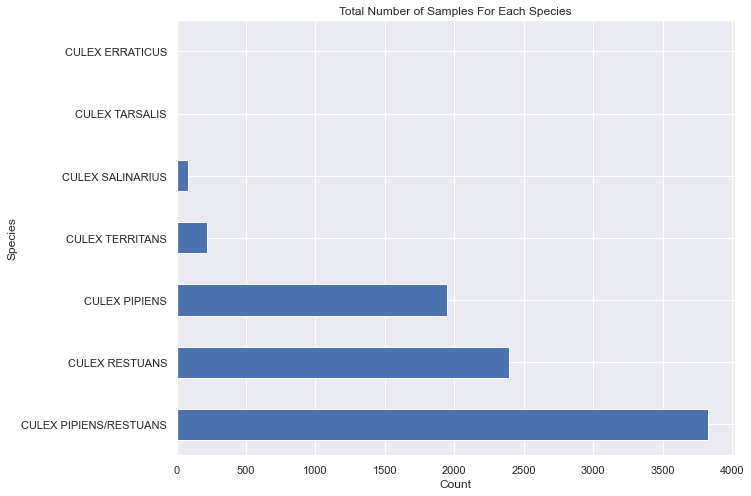

In [52]:
# Visualization of species sample distribution
train['species'].value_counts().plot(kind='barh', figsize=(10,8))
plt.title('Total Number of Samples For Each Species')
plt.xlabel('Count')
plt.ylabel('Species')

In [53]:
# Which species of mosquito are known to carry the West Nile Virus? 
# Wow many of the total population has the virus?
mosq_wnv = train[['species', 'nummosquitos', 'wnvpresent']].groupby(by='species').sum()
mosq_wnv.reset_index(inplace=True)
mosq_wnv

,species,nummosquitos,wnvpresent
0,CULEX ERRATICUS,7,0
1,CULEX PIPIENS,44671,184
2,CULEX PIPIENS/RESTUANS,66268,225
3,CULEX RESTUANS,23431,48
4,CULEX SALINARIUS,145,0
5,CULEX TARSALIS,7,0
6,CULEX TERRITANS,510,0


Text(0, 0.5, 'Species')

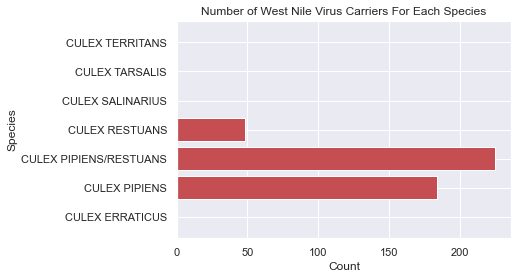

In [54]:
plt.barh(mosq_wnv['species'], mosq_wnv['wnvpresent'], color='r')
plt.title('Number of West Nile Virus Carriers For Each Species')
plt.xlabel('Count')
plt.ylabel('Species')

As seen from the visualizations, the majority of the mosquitos caught belongs to the Culex Pipiens and Culex Restuans species. As such, there are also the species which are the main carriers of the West Nile Virus

In [55]:
train.groupby(['year','month']).nummosquitos.sum().unstack(fill_value=0)

month,5,6,7,8,9,10
year,,,,,,
2007,40,428,7199,40015,9300,1706
2009,190,7390,8833,2346,2137,212
2011,0,4049,8445,2968,3337,0
2013,0,4711,12771,12707,6255,0


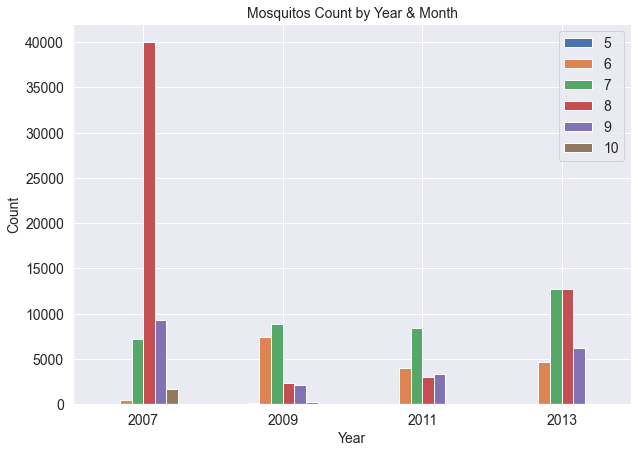

In [56]:
#Mosquito Count by years and month
train.groupby(['year','month']).nummosquitos.sum().unstack(fill_value=0).plot.bar(figsize=(10,7))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mosquitos Count by Year & Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.legend(fontsize=14)
plt.show()

It is observed that there is a spike in mosquitos from June onwards. This is probably due to the summer season in America in which the conditions are ideal for mosquitos to breed and mass reproduce. Hence, efforts could be directed at controlling the mosquitos population during those months to contain the spread of the West Nile Virus.

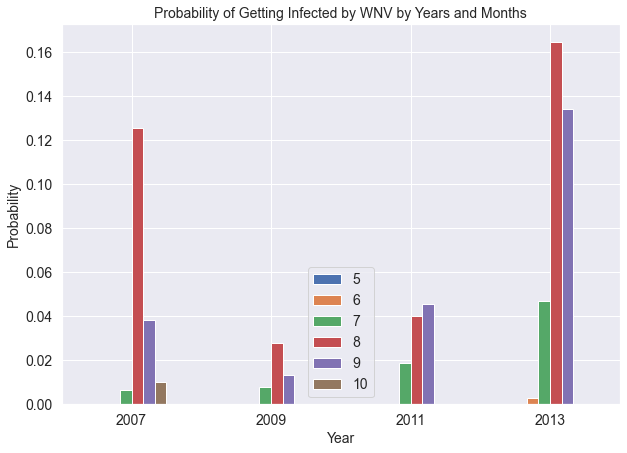

In [57]:
# Probability of Getting Infected by WNV
train_weather.groupby(['year','month']).wnvpresent.mean().unstack(fill_value=0).plot.bar(figsize=(10,7))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Probability of Getting Infected by WNV by Years and Months', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.legend(fontsize=14)
plt.show()

The probability of getting infected with the West Nile Virus is highest in July and August, in relation to the spike in mosquito numbers

[Text(0.5, 0, 'Mosquito Count'),
 Text(0, 0.5, 'WNV Detections'),
 Text(0.5, 1.0, 'Mosquito Count vs WNV Detection')]

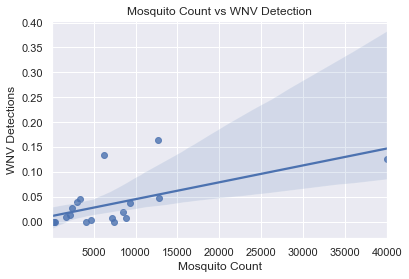

In [58]:
a = train.groupby(['year','month']).nummosquitos.sum()
b = train.groupby(['year','month']).wnvpresent.mean()
ax = sns.regplot(x=a, y=b, data=train) 
ax.set(xlabel='Mosquito Count', ylabel='WNV Detections', title='Mosquito Count vs WNV Detection')

To support the inference above, this plot shows the linear relationship between the mosquito count and WNV detection. There is a possible outlier at the 40000 mark but its linked to the large number of mosquitos in August 2007 so it will be kept in the graph.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '8'),
  Text(4, 0, '9'),
  Text(5, 0, '10')])

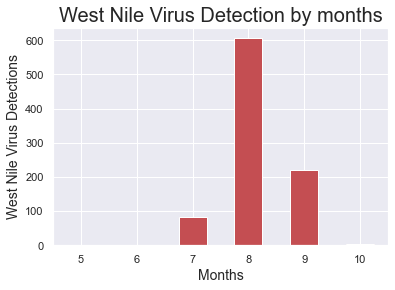

In [59]:
train_weather.groupby(['month'])['wnvpresent'].sum().plot.bar(color='r')
plt.title("West Nile Virus Detection by months", fontsize=20)
plt.xlabel("Months", fontsize =14)
plt.ylabel("West Nile Virus Detections", fontsize=14)
plt.xticks(rotation=0)

On an average across the years, August is the peak month for wnv detections.

(array([0, 1, 2, 3]),
 [Text(0, 0, '2007'),
  Text(1, 0, '2009'),
  Text(2, 0, '2011'),
  Text(3, 0, '2013')])

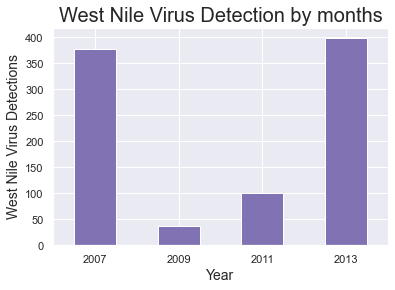

In [60]:
train_weather.groupby(['year'])['wnvpresent'].sum().plot.bar(color='m')
plt.title("West Nile Virus Detection by months", fontsize=20)
plt.xlabel("Year", fontsize =14)
plt.ylabel("West Nile Virus Detections", fontsize=14)
plt.xticks(rotation=0)

2007 and 2013 are the years with the most wnv detections

### Trap EDA

In [61]:
train.trap.value_counts().head(10)

900    154
002    147
135    147
115    143
151    143
031    139
048    139
054    136
090    135
138    129
Name: trap, dtype: int64

Trap ID 900 is sampled the most at 154 times, followed by 002/135 at 147 times.

### Weather EDA

In [62]:
weather.columns

Index(['station', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed', 'year', 'month', 'day'],
      dtype='object')

In [63]:
weather_list = ['tmax','tmin','tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed']
weather.groupby(['year','month'])[weather_list].mean()

tmax       tmin       tavg    depart   dewpoint    wetbulb  \
year month                                                                    
2007 5      75.758065  53.032258  64.516129  5.258065  45.790323  54.580645   
     6      81.433333  62.516667  72.200000  3.333333  56.600000  62.983333   
     7      83.177419  64.709677  74.193548  0.677419  58.838710  64.758065   
     8      83.048387  67.145161  75.387097  3.322581  64.096774  68.161290   
     9      79.200000  58.316667  68.916667  4.433333  53.050000  59.900000   
     10     68.387097  50.822581  59.838710  7.129032  47.080645  53.177419   
2008 5      66.129032  45.935484  56.322581 -2.935484  42.306452  49.741935   
     6      81.016667  61.700000  71.616667  2.866667  57.333333  63.000000   
     7      84.112903  64.693548  74.806452  0.935484  60.774194  66.096774   
     8      81.774194  64.322581  73.306452  1.193548  59.419355  64.725806   
     9      75.383333  58.166667  67.000000  2.500000  56.250000  60.600000   
     10     61.870968  44.693548  53.500000  0.709677  40.580645  47.322581   
2009 5      70.677419  50.419355  60.758065  1.322581  44.129032  52.193548   
     6      77.183333  59.283333  68.516667 -0.366667  55.400000  60.850000   
     7      78.629032  61.725806  70.403226 -3.774194  56.129032  62.032258   
     8      79.225806  62.677419  71.225806 -1.064516  58.806452  63.596774   
     9      74.066667  57.366667  65.983333  1.766667  55.616667  59.883333   
     10     55.483871  42.951613  49.483871 -3.032258  41.580645  45.645161   
2010 5      71.193548  53.161290  62.419355  3.193548  48.596774  54.854839   
     6      80.216667  62.800000  71.800000  3.233333  60.350000  64.650000   
     7      87.080645  69.080645  78.354839  4.612903  64.016129  69.064516   
     8      85.451613  68.322581  77.112903  5.225806  63.564516  68.403226   
     9      74.383333  56.816667  65.833333  1.566667  52.100000  58.033333   
     10     66.790323  45.870968  56.612903  4.129032  40.177419  48.483871   
2011 5      68.354839  49.193548  59.016129 -0.645161  47.967742  53.112903   
     6      79.516667  60.733333  70.366667  1.400000  57.483333  62.666667   
     7      88.967742  70.596774  79.951613  6.000000  64.548387  70.048387   
     8      82.612903  65.338710  74.258065  2.000000  61.967742  66.516129   
     9      70.216667  55.466667  63.050000 -1.400000  52.266667  56.983333   
     10     64.887097  45.467742  55.370968  2.967742  42.177419  48.661290   
2012 5      75.935484  55.354839  65.887097  7.064516  47.403226  55.983871   
     6      84.816667  63.300000  74.316667  6.000000  53.733333  62.433333   
     7      91.564516  71.790323  82.000000  8.000000  64.274194  70.306452   
     8      84.209677  64.500000  74.451613  1.741935  58.225806  64.580645   
     9      74.783333  55.233333  65.316667  0.600000  50.616667  57.083333   
     10     60.887097  43.693548  52.500000 -0.419355  40.580645  46.983871   
2013 5      71.741935  51.645161  61.887097  2.483871  47.709677  54.419355   
     6      78.333333  59.800000  69.300000  0.533333  56.466667  61.550000   
     7      82.225806  65.612903  74.129032  0.032258  61.112903  66.032258   
     8      82.887097  64.403226  73.919355  1.483871  59.887097  65.338710   
     9      77.716667  58.500000  68.066667  3.666667  54.816667  60.333333   
     10     62.822581  45.129032  54.096774  1.258065  44.016129  49.177419   
2014 5      72.193548  51.564516  61.919355  1.903226  46.596774  53.693548   
     6      81.600000  62.350000  72.250000  2.966667  58.050000  63.633333   
     7      80.354839  62.370968  71.645161 -2.709677  56.677419  62.790323   
     8      82.532258  66.290323  74.790323  2.193548  62.274194  66.709677   
     9      74.416667  55.616667  65.250000  0.333333  53.083333  58.166667   
     10     61.548387  45.161290  53.661290  0.193548  42.354839  48.258065   

                 heat       cool  preciptotal  stnpressure   seale

#### Max Temperature

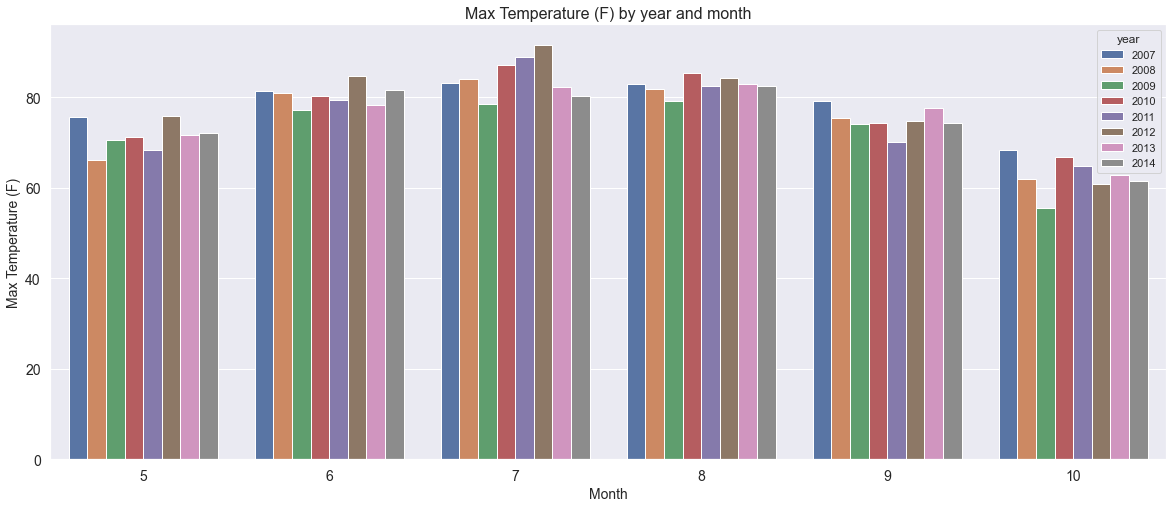

In [64]:
plt.figure(figsize=(20,8))
sns.barplot(data=weather,x='month',y='tmax',hue='year', ci=None)
plt.title('Max Temperature (F) by year and month', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.tick_params(labelsize=14)

#### Min Temperature

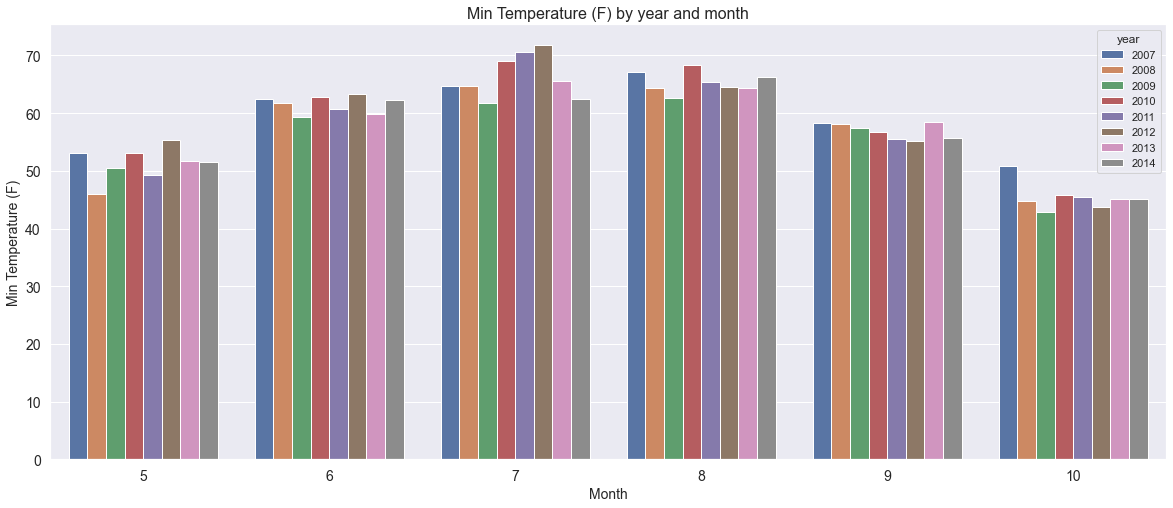

In [65]:
plt.figure(figsize=(20,8))
sns.barplot(data=weather,x='month',y='tmin',hue='year', ci=None)
plt.title('Min Temperature (F) by year and month', fontsize=16)
plt.ylabel('Min Temperature (F)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.tick_params(labelsize=14)

#### Average Temperature

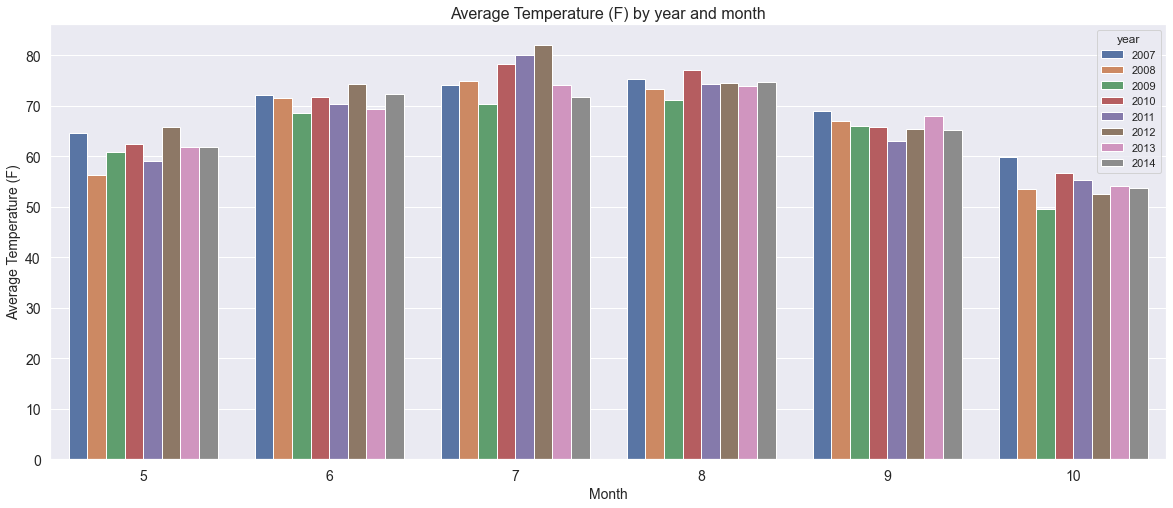

In [66]:
plt.figure(figsize=(20,8))
sns.barplot(data=weather,x='month',y='tavg',hue='year', ci=None)
plt.title('Average Temperature (F) by year and month', fontsize=16)
plt.ylabel('Average Temperature (F)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.tick_params(labelsize=14)

The temperatures for the different years and months seems pretty consistent without much major variations throughout the years. July and August are the hottest months, which relates to having the highest mosquito count as seen in the visualizations above.

### Trap EDA

In [67]:
train.trap.unique()

array(['002', '007', '015', '045', '046', '048', '049', '050', '054',
       '086', '091', '094', '096', '129', '143', '148', '153', '159',
       '009', '011', '016', '019', '025', '028', '031', '033', '089',
       '090', '092', '135', '141', '142', '145', '146', '147', '149',
       '150', '151', '152', '154', '158', '162', '218', '220', '001',
       '003', '006', '008', '012', '034', '037', '040', '043', '047',
       '051', '085', '088', '161', '219', '013', '014', '018', '030',
       '084', '144', '160', '005', '017', '044', '095', '004', '035',
       '036', '039', '060', '061', '062', '065', '066', '067', '069',
       '070', '071', '073', '074', '075', '076', '077', '079', '080',
       '081', '082', '083', '114', '155', '063', '115', '138', '200',
       '206', '209', '212', '215', '107', '128', '072', '027', '078',
       '097', '099', '100', '102', '103', '156', '157', '221', '900',
       '903', '222', '223', '225', '227', '224', '226', '229', '230',
       '228', '232',

### Dewpoint EDA

Text(0, 0.5, 'Number of West Nile Virus Detections ')

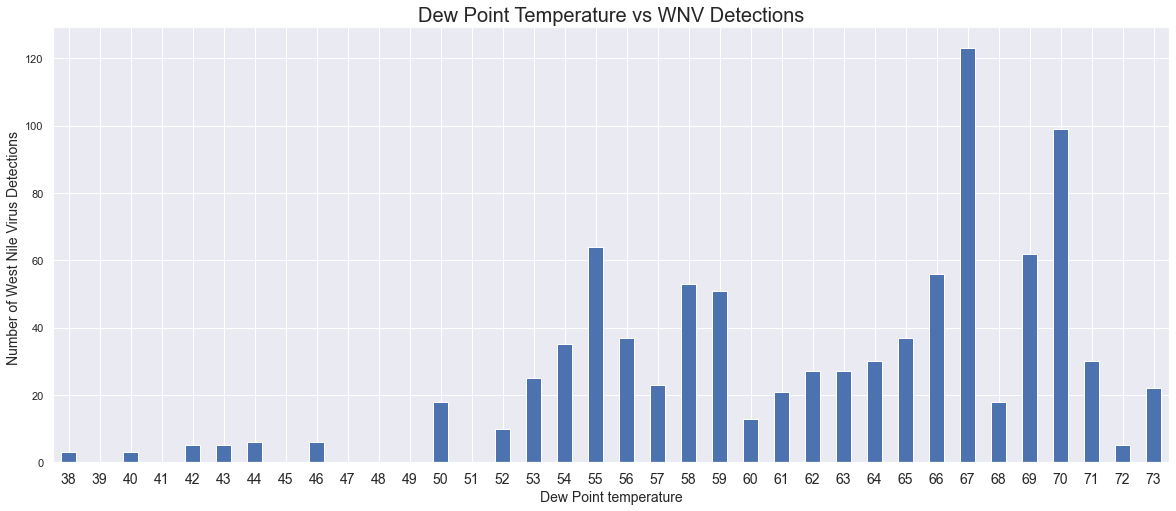

In [68]:
plt.figure(figsize=(20,8))
train_weather.groupby(['dewpoint'])['wnvpresent'].sum().plot.bar()
plt.title("Dew Point Temperature vs WNV Detections", fontsize=20)
plt.xlabel("Dew Point temperature", fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.ylabel("Number of West Nile Virus Detections ", fontsize=14)

The West Nile virus seems to be detected in the higher temprature ranges. 
The optimal temperature for wnv to be present is 67 Farenheit.
Most temperatures beyond 53 Farenheit have a greater chance of detection.

### Precipitation EDA

Text(0, 0.5, 'Number of West Nile Virus Detections ')

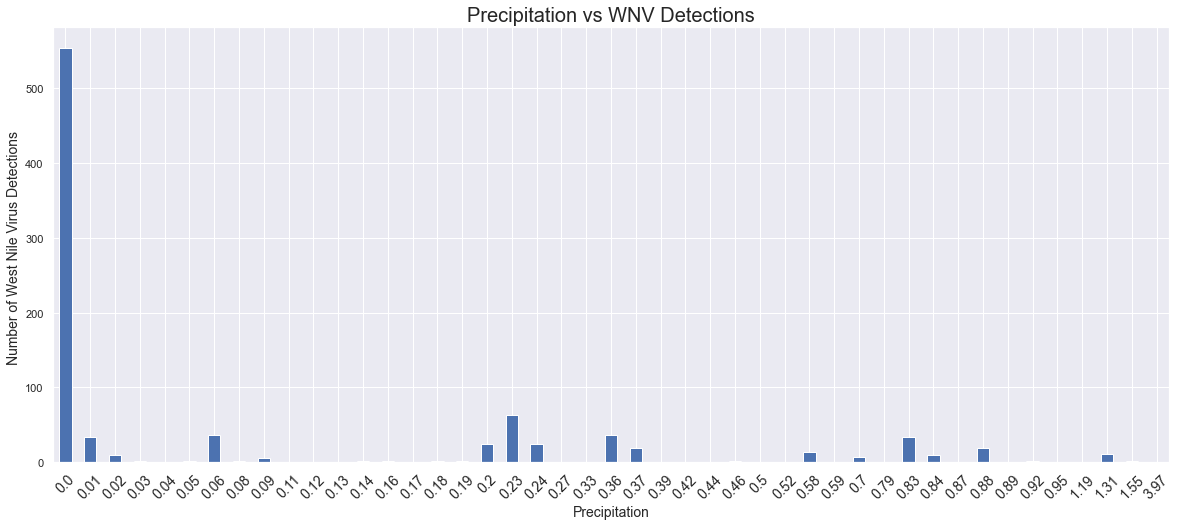

In [69]:
plt.figure(figsize=(20,8))
train_weather.groupby(['preciptotal'])['wnvpresent'].sum().plot.bar()
plt.title("Precipitation vs WNV Detections", fontsize=20)
plt.xlabel("Precipitation", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("Number of West Nile Virus Detections ", fontsize=14)

The highest detection count is at 0.0 precipation followed by 0.23.

### Wet Bulb Temperature EDA

Text(0, 0.5, 'West Nile Virus detections')

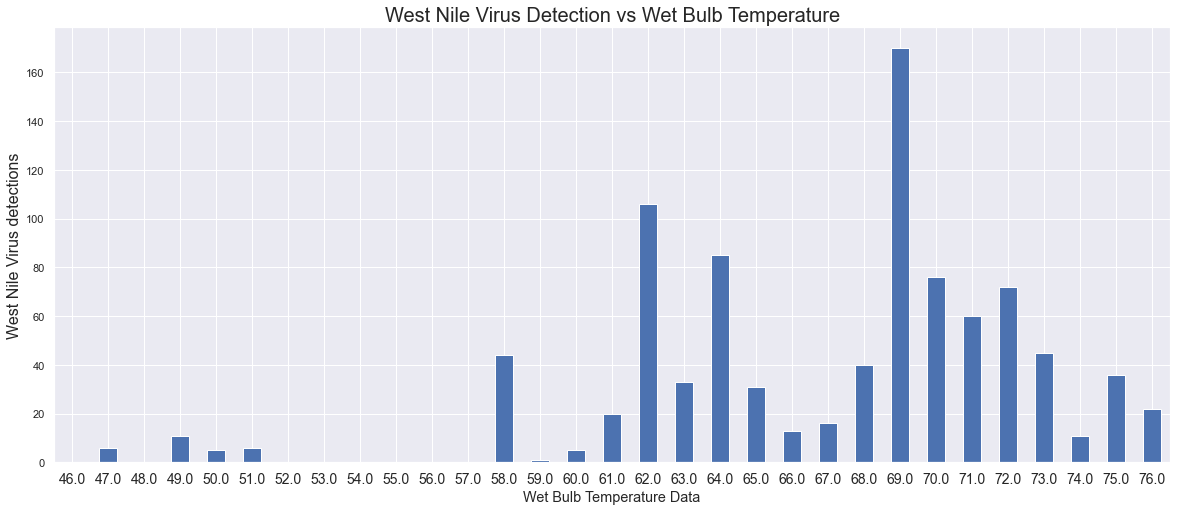

In [70]:
plt.figure(figsize=(20,8))
train_weather.groupby(['wetbulb'])['wnvpresent'].sum().plot.bar()
plt.title("West Nile Virus Detection vs Wet Bulb Temperature", fontsize=20)
plt.xlabel("Wet Bulb Temperature Data", fontsize ='large')
plt.xticks(rotation=0, fontsize=14)
plt.ylabel("West Nile Virus detections", fontsize=16)

The West Nile virus seems to be detected in the higher temprature ranges. 
The optimal temperature for wnv to be present is 69 Farenheit.
Most temperatures beyond 58 degrees Farenheit have a greater chance of detection.

### Cooling Temperature EDA

Text(0, 0.5, 'West Nile Virus detections')

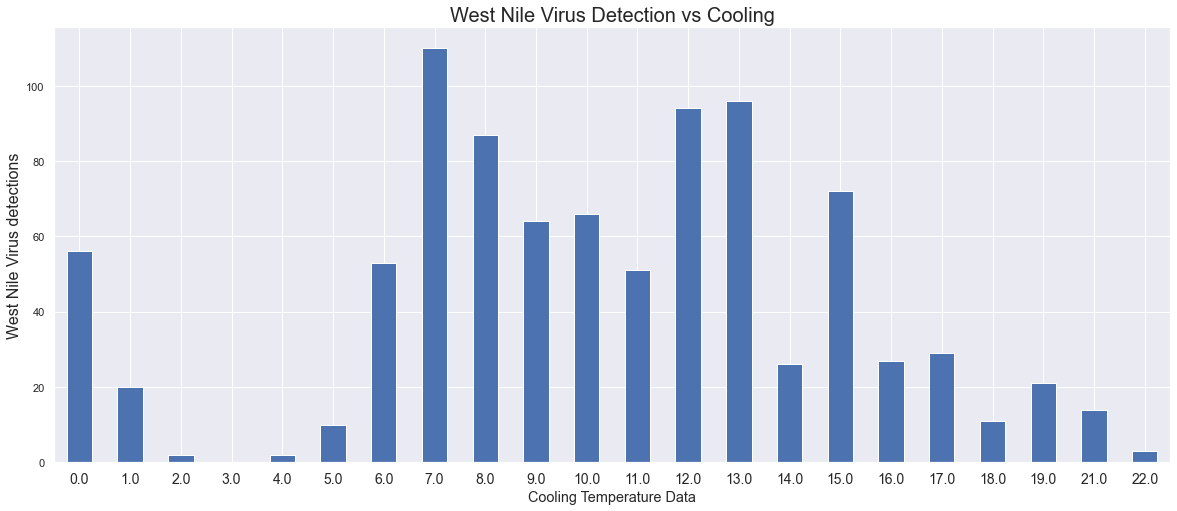

In [71]:
plt.figure(figsize=(20,8))
train_weather.groupby(['cool'])['wnvpresent'].sum().plot.bar()
plt.title("West Nile Virus Detection vs Cooling", fontsize=20)
plt.xlabel("Cooling Temperature Data", fontsize ='large')
plt.xticks(rotation=0, fontsize=14)
plt.ylabel("West Nile Virus detections", fontsize=16)

It is seen that there is a higher detection of the virus at temperatures ranging from 7 degrees Farenheit to 15 degrees Farenheit.

Text(0, 0.5, 'West Nile Virus detections')

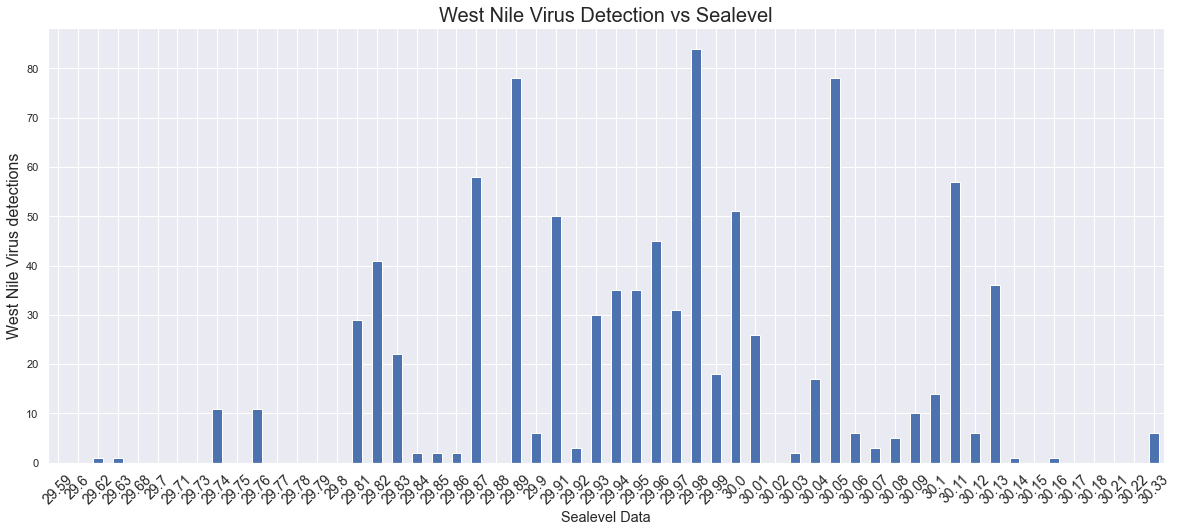

In [72]:
plt.figure(figsize=(20,8))
train_weather.groupby(['sealevel'])['wnvpresent'].sum().plot.bar()
plt.title("West Nile Virus Detection vs Sealevel", fontsize=20)
plt.xlabel("Sealevel Data", fontsize ='large')
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("West Nile Virus detections", fontsize=16)

Optimal range for sealevel ranges between 29.81 to 30.13.

### Optimal Conditions for WNV Detection

In [73]:
#Optimal Conditions
optimal_tmax = train_weather.groupby(['tmax'])['wnvpresent'].sum().idxmax()
print(f'Optimal Max Temperature (°F):', optimal_tmax)

optimal_tmin = train_weather.groupby(['tmin'])['wnvpresent'].sum().idxmax()
print(f'Optimal Min Temperature (°F):', optimal_tmin)

optimal_tavg = train_weather.groupby(['tavg'])['wnvpresent'].sum().idxmax()
print(f'Optimal Average Temperature (°F):', optimal_tavg)

optimal_depart = train_weather.groupby(['depart'])['wnvpresent'].sum().idxmax()
print(f'Optimal Departure from Normal:', optimal_depart)

optimal_dewpoint = train_weather.groupby(['dewpoint'])['wnvpresent'].sum().idxmax()
print(f'Optimal Dewpoint (°F):', optimal_dewpoint)

optimal_wetbulb = train_weather.groupby(['wetbulb'])['wnvpresent'].sum().idxmax()
print(f'Optimal Wetbulb (°F):', optimal_wetbulb)

optimal_heating = train_weather.groupby(['heat'])['wnvpresent'].sum().idxmax()
print(f'Optimal Heating (°F):', optimal_heating)

optimal_cooling = train_weather.groupby(['cool'])['wnvpresent'].sum().idxmax()
print(f'Optimal Cooling (°F):', optimal_cooling)

optimal_precipitation = train_weather.groupby(['preciptotal'])['wnvpresent'].sum().idxmax()
print(f'Optimal Total Precipitation (inches):', optimal_precipitation)

optimal_stnpressure = train_weather.groupby(['stnpressure'])['wnvpresent'].sum().idxmax()
print(f'Optimal Station Pressure (inches):', optimal_stnpressure)

optimal_sealevel = train_weather.groupby(['sealevel'])['wnvpresent'].sum().idxmax()
print(f'Optimal Sealevel (inches):', optimal_sealevel)

optimal_resultspeed = train_weather.groupby(['resultspeed'])['wnvpresent'].sum().idxmax()
print(f'Optimal Resultant Wind Speed (mph):', optimal_resultspeed)

optimal_resultdir = train_weather.groupby(['resultdir'])['wnvpresent'].sum().idxmax()
print(f'Optimal Resultant Wind Direction:', optimal_resultdir)

optimal_avgspeed = train_weather.groupby(['avgspeed'])['wnvpresent'].sum().idxmax()
print(f'Optimal Resultant Average Speed (mph):', optimal_avgspeed)

Optimal Max Temperature (°F): 78
Optimal Min Temperature (°F): 69
Optimal Average Temperature (°F): 72.0
Optimal Departure from Normal: 4.0
Optimal Dewpoint (°F): 67
Optimal Wetbulb (°F): 69.0
Optimal Heating (°F): 0.0
Optimal Cooling (°F): 7.0
Optimal Total Precipitation (inches): 0.0
Optimal Station Pressure (inches): 29.29
Optimal Sealevel (inches): 29.98
Optimal Resultant Wind Speed (mph): 3.5
Optimal Resultant Wind Direction: 24
Optimal Resultant Average Speed (mph): 6.0


In [74]:
# df to show optimal conditions
optimal_conditions_df = pd.DataFrame([[optimal_tmax], [optimal_tmin], [optimal_tavg], [optimal_depart], [optimal_dewpoint], 
                                    [optimal_wetbulb], [optimal_heating], [optimal_cooling], [optimal_precipitation], 
                                   [optimal_stnpressure], [optimal_sealevel], [optimal_resultspeed], [optimal_resultdir],
                                   [optimal_avgspeed]],
                                  columns = ['Optimal Conditions'], 
                                  index=['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
                                  'heat', 'cool', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
                                  'resultdir', 'avgspeed'])
optimal_conditions_df

,Optimal Conditions
tmax,78.00
tmin,69.00
tavg,72.00
depart,4.00
dewpoint,67.00
wetbulb,69.00
heat,0.00
cool,7.00
preciptotal,0.00
stnpressure,29.29


### Spray EDA

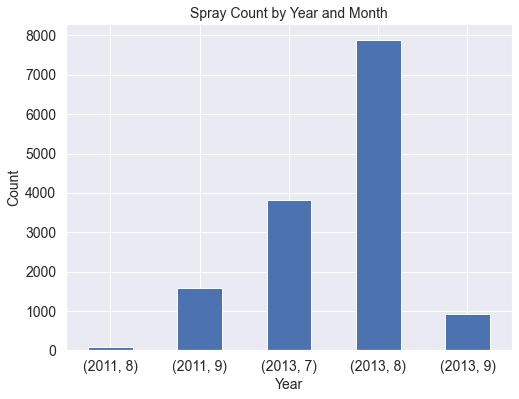

In [75]:
spray.groupby(['year', 'month']).day.count().plot.bar(figsize=(8,6))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Spray Count by Year and Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.show()

In [76]:
spray.month.unique()

array([8, 9, 7])

The spray data is collected only in the months of July, August and September as those are the periods with the highest mosquito count. Data is for years 2011 and 2013

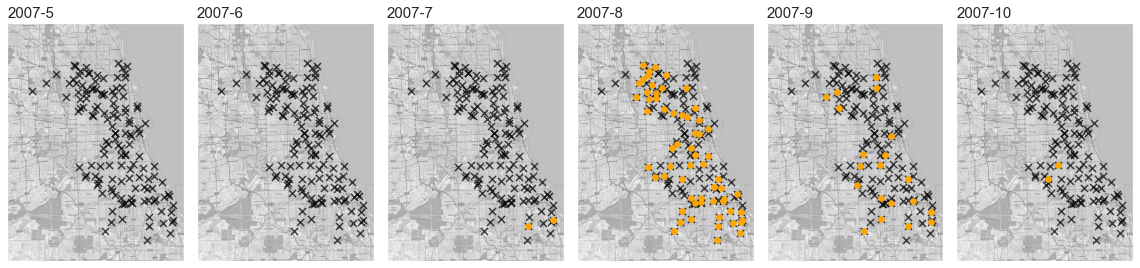

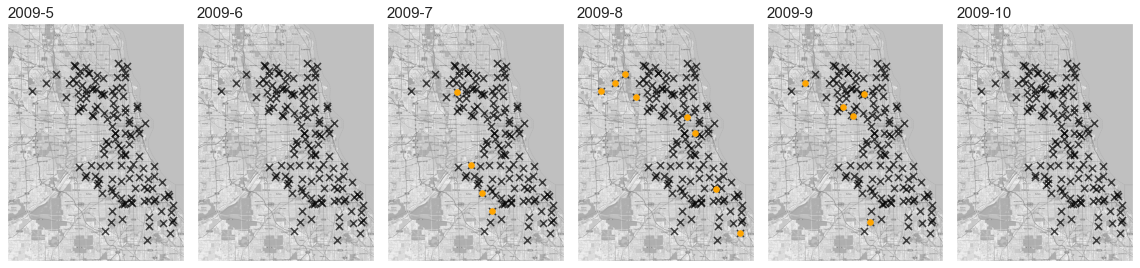

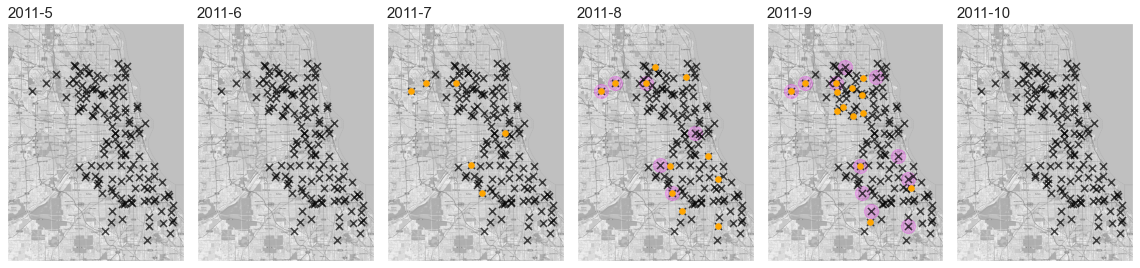

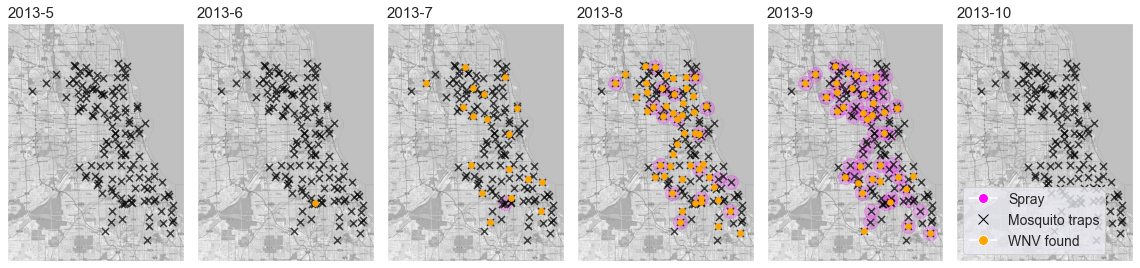

In [77]:
# Adapted from Elaine Z

# set up basemap
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# create plot for each month and year 
for year in train_weather.year.unique():
    fig, ax = plt.subplots(ncols = 6, figsize = (16,5))
    
    for i, month in enumerate([5,6,7,8,9,10]):
        # plot basemap
        ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
        
        # plot spray locations for year and month
        if year in spray.year.unique() and month in spray.month.unique():
            spray_location = spray[(spray.year == year) & (spray.month == month)][['longitude', 'latitude']].drop_duplicates().values
            ax[i].scatter(wnv[:,0], wnv[:,1], marker='o', c = 'magenta', s = 200, alpha = 0.2)
        
        # plot trap locations
        locations = train_weather[['longitude', 'latitude']].drop_duplicates().values
        ax[i].scatter(locations[:,0], locations[:,1], marker='x', c = 'black', s=50, alpha = 0.7)
        
        # plot wnv locations for year and month
        wnv = train_weather[(train_weather.year == year) & (train_weather.month == month) & (train_weather.wnvpresent == 1)]\
                [['longitude', 'latitude']].drop_duplicates().values
        ax[i].scatter(wnv[:,0], wnv[:,1], marker='o', c = 'orange', s = 30)
        
        # title and axes
        ax[i].set_title(f"{year}-{month}", fontsize = 15, ha = 'left', position = (0,1))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
        plt.tight_layout()
#         plt.savefig(f'heatmap_{year}_{month}')

# custom legend
legend_elements=[Line2D([0],[0],marker='o', color='w',label='Spray', markerfacecolor='magenta', markersize=10),
                 Line2D([0],[0],marker='x', color='black', label='Mosquito traps',linestyle='', markersize=10),
                 Line2D([0],[0],marker='o', color='w',label='WNV found',markerfacecolor='orange', markersize=10)]

plt.legend(handles=legend_elements, loc='lower left', fontsize=14)
plt.tight_layout()

As expected, the number of wnv detections is highest in August as mosquito counts start to spike from july onwards. This comes in line with the higher average temperatures in the months July and August, contributing to high mosquito reproductivity due to optimal breeding conditions.

### Additional EDA 

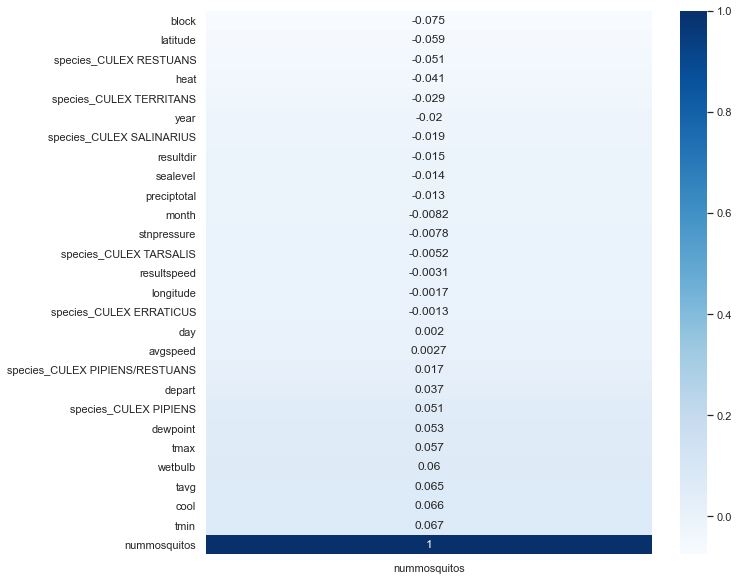

In [78]:
plt.figure(figsize=(10,10))
nummosq_heatmap = train_weather.drop(['station', 'wnvpresent'], axis='columns')
sns.heatmap(nummosq_heatmap.corr()[['nummosquitos']].sort_values('nummosquitos'), annot=True, cmap='Blues');

The variables with the highest correlation to the mosquito count are minimum temperature, cooling temperature and wetbulb temperature.

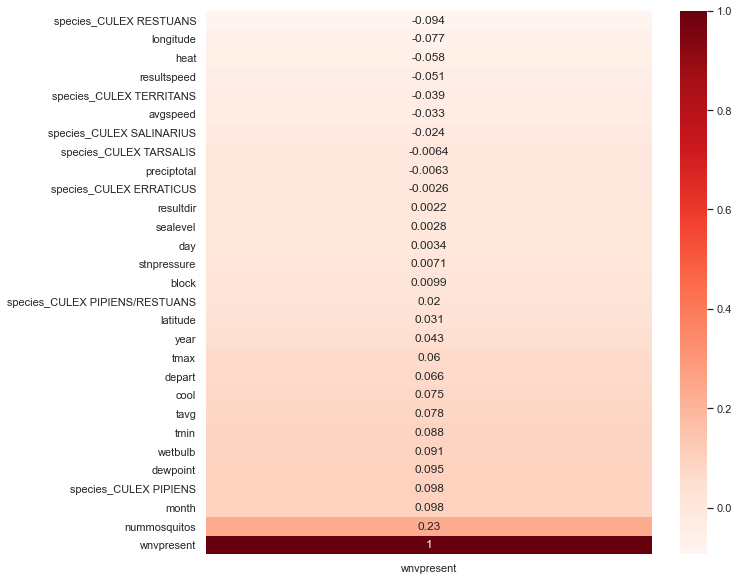

In [79]:
plt.figure(figsize=(10,10))
wnvpresent_heatmap = train_weather.drop(['station'], axis='columns')
sns.heatmap(wnvpresent_heatmap.corr()[['wnvpresent']].sort_values('wnvpresent'), annot=True, cmap='Reds');

As seen from the heatmap, the factors with the highest correlation to the presence of the WNV are the number of mosquitos, month and dewpoint temperature

In [80]:
wnvpresent_heatmap.corr()

,block,latitude,longitude,nummosquitos,wnvpresent,year,month,day,tmax,tmin,...,resultspeed,resultdir,avgspeed,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS
block,1.000000,0.092576,-0.191874,-0.075044,0.009859,0.010887,0.013560,-0.002249,0.030692,0.031420,...,-0.008452,0.015183,-0.006701,-0.013040,-0.005479,0.015964,-0.002748,-0.022696,-0.009326,-0.011272
latitude,0.092576,1.000000,-0.636842,-0.058984,0.030862,0.014907,-0.037557,0.020471,-0.010589,-0.027019,...,0.000487,-0.013939,-0.013067,0.013255,-0.036621,0.026417,0.033340,-0.023219,-0.006640,-0.066125
longitude,-0.191874,-0.636842,1.000000,-0.001723,-0.076732,-0.046790,0.036582,-0.017663,0.041548,0.049144,...,0.014010,0.022662,0.031824,-0.025308,0.013823,-0.003069,-0.034783,0.009600,0.010519,0.066095
nummosquitos,-0.075044,-0.058984,-0.001723,1.000000,0.233532,-0.020427,-0.008207,0.002037,0.056898,0.066552,...,-0.003050,-0.014915,0.002663,-0.001293,0.050782,0.016754,-0.051316,-0.018792,-0.005235,-0.029235
wnvpresent,0.009859,0.030862,-0.076732,0.233532,1.000000,0.043038,0.097948,0.003400,0.060403,0.088011,...,-0.051138,0.002150,-0.033466,-0.002593,0.097868,0.019620,-0.094047,-0.023743,-0.006355,-0.038609
year,0.010887,0.014907,-0.046790,-0.020427,0.043038,1.000000,-0.143245,0.109160,-0.063785,-0.071291,...,0.070590,0.037305,-0.001812,0.015314,-0.149653,0.016013,0.148780,-0.044807,0.007080,-0.050106
month,0.013560,-0.037557,0.036582,-0.008207,0.097948,-0.143245,1.000000,-0.240592,-0.011677,-0.084177,...,-0.160406,0.048296,-0.173676,0.012733,0.251859,0.027327,-0.273179,-0.016368,0.027198,0.026126
day,-0.002249,0.020471,-0.017663,0.002037,0.003400,0.109160,-0.240592,1.000000,-0.022966,0.111222,...,0.075372,0.153910,0.154758,-0.011790,-0.056285,0.037886,0.009686,-0.016087,0.010702,0.012080
tmax,0.030692,-0.010589,0.041548,0.056898,0.060403,-0.063785,-0.011677,-0.022966,1.000000,0.772739,...,-0.022018,0.179598,0.010978,0.005403,0.052919,-0.018555,-0.044948,0.006809,-0.053463,0.050042
tmin,0.031420,-0.027019,0.049144,0.066552,0.088011,-0.071291,-0.084177,0.111222,0.772739,1.000000,...,0.053453,0.118109,0.153117,-0.004987,0.055207,-0.020768,-0.040375,0.014370,-0.040250,0.031619


---
---

### <span style="color:steelblue"> 7) Key Points and Summary</span>


#### 1) 3 species namely, Culex Pipiens, Culex Restuans and Culex Pipiens/Restuans have the highest mosquito counts
#### 2) The 3 species above are the main carriers of the West Nile Virus
#### 3) There is a spike in mosquito numbers in July and August over the years, in  addition, those are also the hottest months recorded
#### 4) West Nile Virus is highly detected in higher temperatures specifically at 67 Farenheit
#### 5) Optimal Conditions shows that higher temperatures and month are the key factors in the virus detection.

---
---